In [1]:
import pyvisa
from qcodes.instrument_drivers.rohde_schwarz import (
    RohdeSchwarzZNB8,
    RohdeSchwarzZNBChannel,
)
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

import numpy as np
from numpy import *

In [2]:
vna = RohdeSchwarzZNB8('VNA', 'GPIB0::20::INSTR', init_s_params=False, reset_channels=False)
vna.add_channel('S21')
# vna.display_single_window()
# vna.channels.autoscale()

Connected to: Rohde-Schwarz ZNB20-2Port (serial:1311601062102129, firmware:3.45) in 5.09s


In [ ]:
freq_range = np.array([5e9, 6e9])
nsteps = 10000
fr0 = np.linspace(freq_range[0], freq_range[1], nsteps)
vna.channels.S21.power(-10)
vna.rf_on()
vna.channels.S21.start(freq_range[0])
vna.channels.S21.stop(freq_range[1])
vna.channels.S21.npts(nsteps)

get_v = vna.channels.S21.trace_mag_phase.get()
vna.rf_off()

font = {'size'   : 14}
matplotlib.rc('font', **font)

fig, ax = plt.subplots(1,2,figsize=(15,7), sharex=True)
ax[0].plot(fr0/1e9, get_v[0], label = 'Magnitude')
ax[1].plot(fr0/1e9, get_v[1], label = 'Phase')
ax[0].set_xlabel('Frequency, GHz')
ax[1].set_xlabel('Frequency, GHz')
ax[0].set_ylabel('Magnitude')
ax[1].set_ylabel('Phase')
ax[0].legend()
ax[1].legend()

Single frequency readout

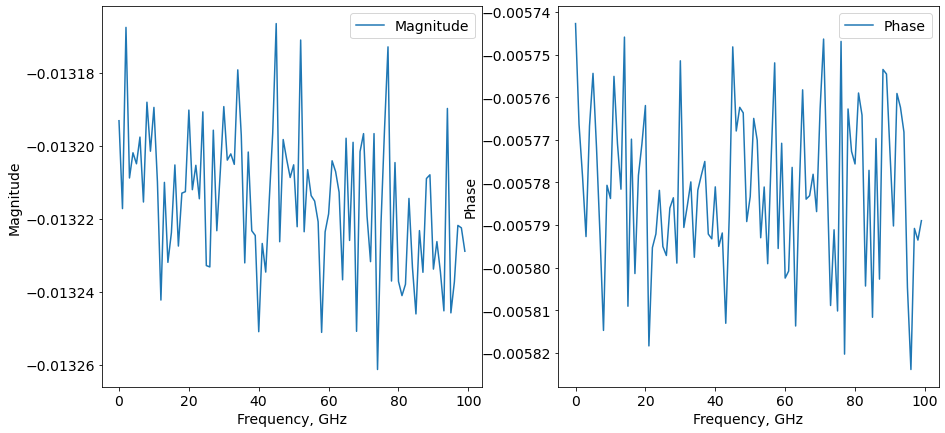

In [9]:
vna.channels.S21.power(-10)
vna.channels.S21.setup_cw_sweep()
vna.channels.S21.npts(100)
vna.channels.S21.bandwidth(10)

vna.channels.S21._set_cw_frequency(6e9)

vna.rf_on()
mag, pha = vna.channels.S21._get_cw_data()
vna.rf_off()

font = {'size'   : 14}
matplotlib.rc('font', **font)

fig, ax = plt.subplots(1,2,figsize=(15,7), sharex=True)
ax[0].plot(mag, label = 'Magnitude')
ax[1].plot(pha, label = 'Phase')
ax[0].set_xlabel('Frequency, GHz')
ax[1].set_xlabel('Frequency, GHz')
ax[0].set_ylabel('Magnitude')
ax[1].set_ylabel('Phase')
ax[0].legend()
ax[1].legend()